In [29]:
using DelimitedFiles
using Optim
using Statistics
using Plots

In [36]:
include("../src/bispectrum_multipoles.jl");
include("../src/TreeLevelBispectrum.jl");
include("../src/utils.jl");
include("../src/reduce.jl");

In [33]:
function smooth_pk(k, keq, ns, A)
    q = k./keq
    L = log.(2*exp(1) .+ 1.8.*q)
    C =  14.2 .+ 731 ./(1 .+ 62.5.*q)
    T = L./(L .+ C.*q.^2)
    Pk = k.^ns.*T.^2
    return A.*Pk
end;

In [34]:
function smooth_bk(k123, keq, ns, A, f, b1, b2, SN1, SN2)
    pk(k) = smooth_pk(k, keq, ns, A) 
    N = size(k123)[2]
    B00smooth = zeros(N)
    for i in 1:N
        B00smooth[i] = B00(k123[1,i], k123[2,i], k123[3,i], b1, b2, f, pk, tree_level_bk) + SN1 + (pk(k123[1,i])+pk(k123[2,i])+pk(k123[3,i]))*SN2
    end
    return B00smooth
end;


In [38]:
function smooth_bk_average_k1(k123, keq, ns, A, f, b1, b2, SN1, SN2)
    bk = smooth_bk(k123, keq, ns, A, f, b1, b2, SN1, SN2)
    return average_over_k1(k123[1,:], collect(0.0:0.01:0.3), bk)
end;

In [42]:
lrg_bk_k1 = readdlm("../data/bk_average_k1.txt");

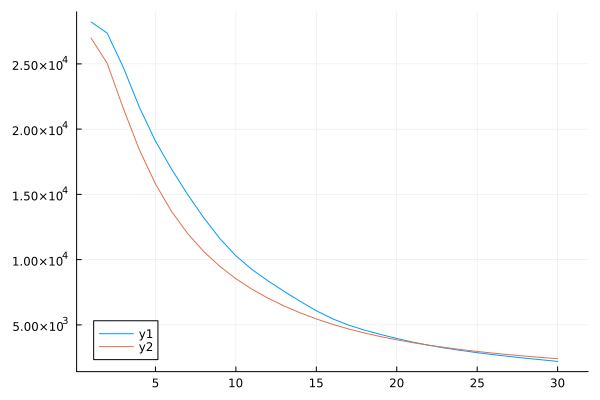

In [56]:
bk_trial = smooth_bk_average_k1(k123, 0.1, 1, 30000, 0.7, 2, 0.3, 300, 300);
plot(lrg_bk_k1)
plot!(bk_trial)

In [60]:
bf_bk_fit = x -> sum((lrg_bk_k1 .- smooth_bk_average_k1(k123, x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8]).^2));

In [63]:
bk_bf = optimize(bf_bk_fit, [0.1, 1, 30000, 0.7, 2, 0.3, 300, 300], Optim.Options(iterations=100, g_reltol=1e-2))

 * Status: failure

 * Candidate solution
    Final objective value:     NaN

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    0
    f(x) calls:    10


In [66]:
bk_bf.result

ErrorException: type MultivariateOptimizationResults has no field result

In [14]:
k123 = kkk_grid(0.005, 0.01, 30)

3×2600 Matrix{Float64}:
 0.005  0.005  0.005  0.005  0.005  …  0.275  0.285  0.285  0.285  0.295
 0.005  0.015  0.025  0.035  0.045     0.295  0.285  0.285  0.295  0.295
 0.005  0.015  0.025  0.035  0.045     0.295  0.285  0.295  0.295  0.295

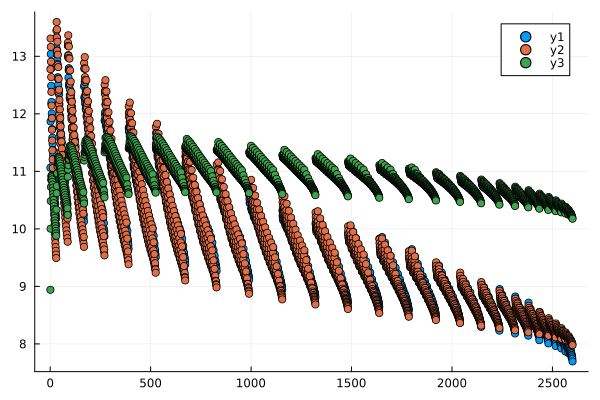

In [15]:
scatter((log.(abs.(bkmean'))))
scatter!((log.(abs.(smooth_bk(k123, 0.15, 0.96, 9e3, 2.5, 2, 0.5, 2e3, 0)))))
scatter!((log.(abs.(smooth_bk(k123, 0.40, 1.35, 2808.98, 2.39, 2.14, 1.06, 1223.48, 881.83)))))
#scatter!((log.(abs.(smooth_bk(k123[:,1170:1320], 0.12, 0.96, 9e3, 2.5, 2, 2, 5e3, 0)))))
#scatter!((log.(abs.(smooth_bk(k123[:,1170:1320], 0.18, 0.96, 9e3, -1, 1, 1, 1e3, 0)))))
#scatter!((log.(abs.(smooth_bk(k123[:,1170:1320], 0.18, 0.96, 9e3, -1.5, 1, 1, 1e3, 0)))))
#scatter!((log.(abs.(smooth_bk(k123[:,1170:1320], 0.18, 0.96, 4e3, 1, 2, 2, 1e3, 0)))))

In [19]:
mm = Optim.minimizer(bk_bf)

UndefVarError: UndefVarError: bk_bf not defined

In [24]:
sbk1 = smooth_bk(k123, 0.15, 0.96, 9e3, 2.5, 2, 0.5, 2e3, 0)
sbk2 = smooth_bk(k123, 0.40, 1.35, 2808.98, 2.39, 2.14, 1.06, 1223.48, 0)

2600-element Vector{Float64}:
  2250.949771516639
  8266.505684830236
 15827.408222770908
 21900.724178500983
 25826.142889725477
 27875.041153158207
 28531.706681724503
 28241.496149219354
 27349.083466863147
 26101.496436011024
     ⋮
 11526.882233049142
 11274.810400186454
 11261.234431554205
 11011.821685813466
 10764.49561399198
 11000.403763046543
 10754.904168132733
 10512.668358609337
 10274.788205949304

In [28]:
@allocated B00(0.1, 0.1, 0.1, 2, 0.3, 0.7, x -> smooth_pk(x, 0.1, 1, 2000), tree_level_bk)

8649836